# Table of contents
- [01 Importing Moduls](#01-Importing-Moduls)

### 01 Importing Moduls

In [1]:
#!pip install yfinance 


In [2]:
import numpy as np
import pandas as pd 
import yfinance as yf
import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

In [65]:
# in this case: Zoom

data=yf.download("ZM", start="2020-01-01", end="2021-07-10",threads= False)
data.info()

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2019-12-31 to 2021-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       384 non-null    float64
 1   High       384 non-null    float64
 2   Low        384 non-null    float64
 3   Close      384 non-null    float64
 4   Adj Close  384 non-null    float64
 5   Volume     384 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.0 KB


In [66]:
data['datetime']=data.index
data.reset_index()
#data.drop("Date", inplace=True)

,Date,Open,High,Low,Close,Adj Close,Volume,datetime
0,2019-12-31,66.379997,68.180000,66.309998,68.040001,68.040001,1351400,2019-12-31
1,2020-01-02,68.800003,69.235001,68.019997,68.720001,68.720001,1315500,2020-01-02
2,2020-01-03,67.620003,68.680000,67.099998,67.279999,67.279999,1127900,2020-01-03
3,2020-01-06,66.629997,70.495003,65.811996,70.320000,70.320000,3151600,2020-01-06
4,2020-01-07,70.290001,72.838997,69.370003,71.900002,71.900002,6985400,2020-01-07
...,...,...,...,...,...,...,...,...
379,2021-07-02,390.480011,398.720001,386.549988,388.890015,388.890015,2065000,2021-07-02
380,2021-07-06,392.579987,403.470001,391.559998,401.119995,401.119995,3436200,2021-07-06
381,2021-07-07,403.859985,406.480011,393.299988,393.910004,393.910004,2026600,2021-07-07
382,2021-07-08,386.000000,390.500000,377.500000,386.010010,386.010010,2748900,2021-07-08


In [67]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,datetime
Date,,,,,,,
2019-12-31,66.379997,68.180000,66.309998,68.040001,68.040001,1351400,2019-12-31
2020-01-02,68.800003,69.235001,68.019997,68.720001,68.720001,1315500,2020-01-02
2020-01-03,67.620003,68.680000,67.099998,67.279999,67.279999,1127900,2020-01-03
2020-01-06,66.629997,70.495003,65.811996,70.320000,70.320000,3151600,2020-01-06
2020-01-07,70.290001,72.838997,69.370003,71.900002,71.900002,6985400,2020-01-07


In [35]:
#!pip install ta # for getting financial indicators 
from ta import add_all_ta_features 


In [36]:
data = add_all_ta_features(
    data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/opt/anaconda3/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [37]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,datetime,volume_adi,volume_obv,volume_cmf,...,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,66.379997,68.180000,66.309998,68.040001,68.040001,1351400,2019-12-31,1.149053e+06,1351400,0.850268,...,-7.486587,0.0,68.040001,0.0,0.000000,0.000000,0.000000,-76.733625,0.000000,0.000000
2020-01-02,68.800003,69.235001,68.019997,68.720001,68.720001,1315500,2020-01-02,1.349360e+06,2666900,0.505966,...,-17.606798,0.0,68.346396,0.0,-0.212333,-0.042467,-0.169866,0.999413,0.994451,0.999413
2020-01-03,67.620003,68.680000,67.099998,67.279999,67.279999,1127900,2020-01-03,4.784500e+05,1539000,0.126080,...,-66.837600,0.0,67.849942,0.0,-1.504085,-0.334790,-1.169294,-2.095463,-2.117730,-1.116993
2020-01-06,66.629997,70.495003,65.811996,70.320000,70.320000,3151600,2020-01-06,3.394501e+06,4690600,0.488670,...,-3.736981,0.0,68.914215,0.0,8.735759,1.479320,7.256440,4.518432,4.419325,3.350968
2020-01-07,70.290001,72.838997,69.370003,71.900002,71.900002,6985400,2020-01-07,6.598252e+06,11676000,0.473611,...,-13.362677,0.0,70.173991,0.0,29.247366,7.032929,22.214437,2.246874,2.222004,5.673134


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2019-12-31 to 2021-07-09
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Open                       384 non-null    float64       
 1   High                       384 non-null    float64       
 2   Low                        384 non-null    float64       
 3   Close                      384 non-null    float64       
 4   Adj Close                  384 non-null    float64       
 5   Volume                     384 non-null    int64         
 6   datetime                   384 non-null    datetime64[ns]
 7   volume_adi                 384 non-null    float64       
 8   volume_obv                 384 non-null    int64         
 9   volume_cmf                 384 non-null    float64       
 10  volume_fi                  384 non-null    float64       
 11  volume_mfi                 384 non-null    float64  

Text(0, 0.5, 'Zoom Opening Stock')

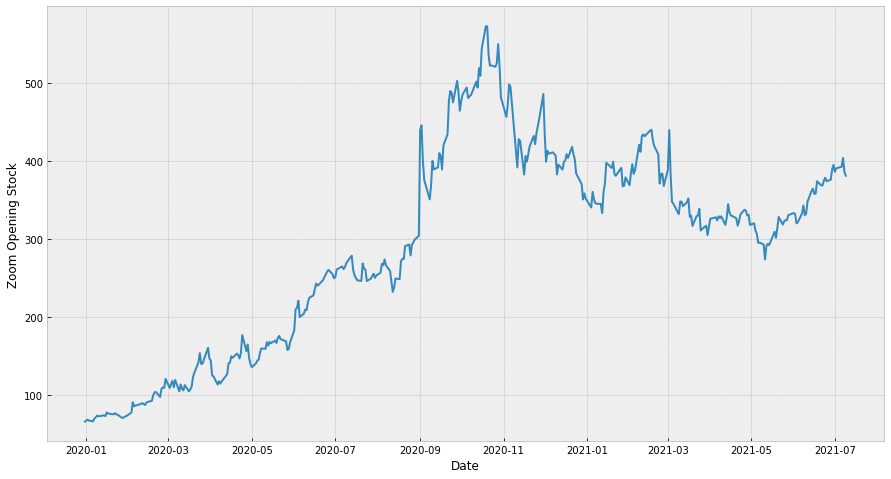

In [68]:
plt.figure(figsize=[15,8])
plt.plot(data.datetime,data.Open)
plt.xlabel("Date")
plt.ylabel("Zoom Opening Stock")

In [69]:
#pip install finnhub-python
#!pip install pystan==2.19.1.1.
#!pip install  prophet

In [70]:
import finnhub

# Setup client
finnhub_client = finnhub.Client(api_key="c2si65iad3ic1qis06lg")

In [71]:
def get_news(company, date_from='2020-01-01', date_to=None):
    '''
    returns dataframe with average sentiment of news headline and sentiment of news summary for every date in a given timeframe
    company: symbol, example ZM
    date_from: string format yyyy-mm-dd
    date_to: string format yyyy-mm-dd
    '''
    sid_obj = sia()
    if date_to is None:
        date_to = datetime.date.today().strftime("%Y-%m-%d")
    result=(finnhub_client.company_news(company, _from=date_from, to=date_to))
    news_df = pd.DataFrame(result)
    news_df['datetime'] = [datetime.datetime.utcfromtimestamp(i).strftime('%Y-%m-%d') for i in news_df.datetime]
    news_df.drop(['id','image', 'related','source', 'url'], axis=1, inplace=True)
    news_df['headline_sentiment'] = [sid_obj.polarity_scores(c)['compound'] for c in news_df['headline']]
    news_df['summary_sentiment'] = [sid_obj.polarity_scores(c)['compound'] for c in news_df['summary']]
    news_dates = news_df.groupby(['datetime']).mean().sort_index().reset_index()
    return news_dates

In [72]:
news_dates=get_news("ZM", date_from='2020-01-01')
#news_dates.info()

In [73]:
news_dates['datetime']=news_dates['datetime'].astype('datetime64[ns]')#datetime64
data['datetime']=data['datetime'].astype('datetime64[ns]')
df=news_dates.merge(data,on="datetime",how='inner')

In [74]:
news_dates.tail()

,datetime,headline_sentiment,summary_sentiment
63,2021-07-07,0.085000,0.327075
64,2021-07-08,0.297575,-0.079200
65,2021-07-09,0.000000,0.113333
66,2021-07-10,0.190900,0.334850
67,2021-07-11,0.220200,0.222700


In [46]:
df_plot=df[df.datetime > '2021-03-01']

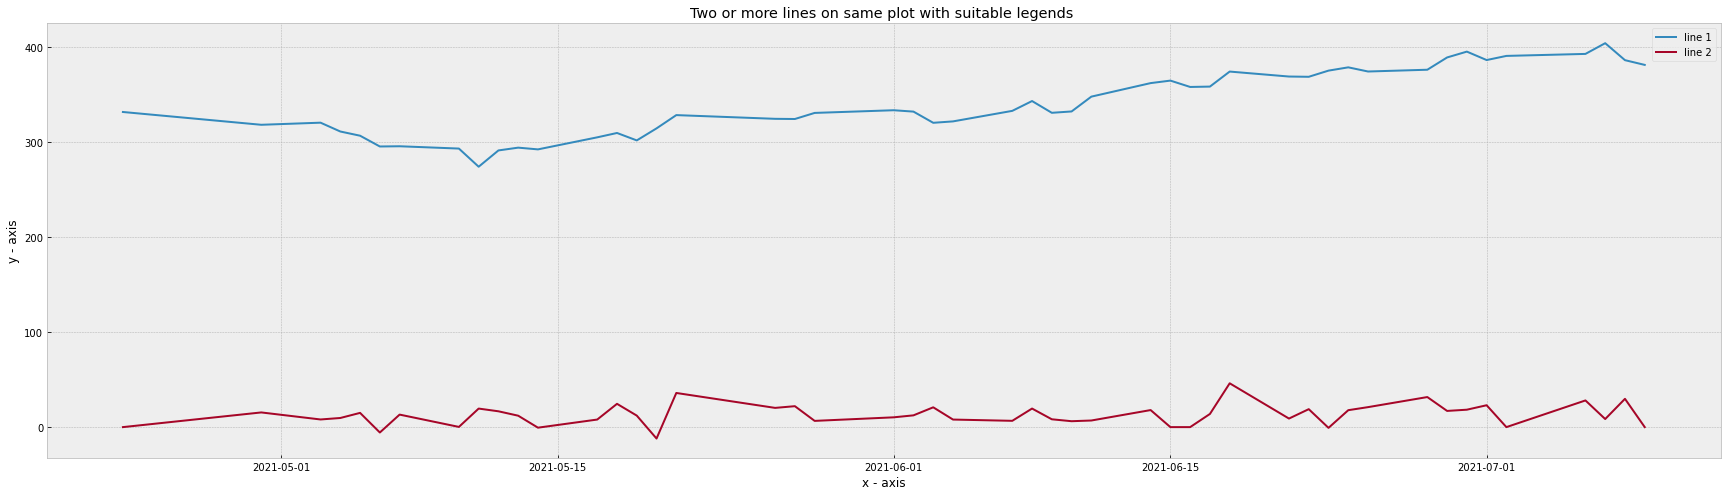

In [47]:
plt.figure(figsize=[30,8])
x1 = df_plot.datetime
y1 = df_plot.Open
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")
# line 2 points
x2 = df_plot.datetime
y2 = df_plot.headline_sentiment*100
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")
#plt.yscale("log")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
df

# Random Forest for Feature Importance 

In [ ]:
#shifting 
move_days = 7
# shifted values column, like this the model can learn what the price is going to be x days later
df["shift_close"]=df[["Close"]].shift(-move_days)

In [ ]:
df.tail(10)

In [ ]:
#x without the NaNs 
X = np.array(df.drop(['shift_close','datetime'],1))[:-move_days]
X = np.array(df.drop(['shift_close','datetime'],1))[:-move_days]
y = df.shift_close[:-move_days]

In [ ]:
# have to make this work somehow
#X= SelectKBest(f_regression, k=20).fit_transform(X, y)
#X = X[:-move_days]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
# training a model on the dataset where we have all data
param_grid = {'min_samples_leaf': [2,3,5,10,20], 'n_estimators': [3,5,10,50,100]}
rf = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
rf=RandomForestRegressor(min_samples_leaf=2, n_estimators=3, random_state=42)
rf.fit(X_train, y_train)

In [ ]:
y_pred_existing=rf.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, y_pred_existing))

In [ ]:
# Now the X variable is going to be the features for the days where we have no "in x Days price"
X_pred=df.drop(['shift_close','datetime'],1)[:-move_days]
X_pred=X_pred.tail(move_days)
#X_pred=np.array(X_pred)
#print(X_pred)

In [ ]:
#values for the next 7 days 
pred=rf.predict(X_pred)
pred

In [ ]:
df_pred=pd.DataFrame(pred)

In [ ]:
pd.to_datetime(df.datetime)

In [ ]:
df_pred

In [ ]:
date_pred=[]
for i in range (1,move_days):
    date_pred.append(df.datetime.iloc[-1]+timedelta(days=i))

In [ ]:
date_pred.todatetime

In [ ]:
df.info()

In [ ]:
from datetime import timedelta, date

In [ ]:
for i in range(1,move_days):
    df_pred['pred_date']=df.datetime.iloc[-1]+timedelta(days=i)
    df_pred.pred_date.astype('datetime64[ns]')

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_pred)


In [ ]:
df.columns

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=X_test.columns,max_display=30)

In [ ]:
df_feature_importance = pd.DataFrame(rf.feature_importances_, index=X_pred.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
print(df_feature_importance)

In [ ]:
plt.plot(np.arange(1,move_days+1,1),pred)
plt.xlabel("Days from now")
plt.ylabel("Price")

### Need to think of a way to plot this nicely

## Facebook Prophet on Close Price

In [ ]:
# FB Prophet 

In [75]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [76]:
df

,datetime,headline_sentiment,summary_sentiment,Open,High,Low,Close,Adj Close,Volume
0,2021-04-23,0.000000,0.571900,331.489990,338.549988,328.239990,336.880005,336.880005,2454300
1,2021-04-30,0.154450,0.316050,318.029999,326.278992,317.239990,319.570007,319.570007,2152500
2,2021-05-03,0.080408,0.224123,320.239990,321.125000,311.529999,313.920013,313.920013,2253000
3,2021-05-04,0.096055,0.273327,310.959991,311.500000,298.769989,304.850006,304.850006,3727600
4,2021-05-05,0.149738,0.326131,306.529999,310.980011,294.500000,297.589996,297.589996,2582600
5,2021-05-06,-0.056656,0.152900,295.200012,295.200012,285.609985,293.049988,293.049988,3369100
6,2021-05-07,0.131675,0.546250,295.437012,304.696991,292.709991,295.239990,295.239990,2446200
7,2021-05-10,0.002150,0.154187,293.010010,293.940002,286.040009,288.489990,288.489990,2507800
8,2021-05-11,0.195082,0.193118,273.910004,302.000000,273.200012,300.250000,300.250000,4084400
9,2021-05-12,0.166418,0.182882,291.049988,296.529999,282.404999,289.700012,289.700012,3419800


In [77]:
data.reset_index(inplace=True)
df_train = df
df_train = df_train.rename(columns={"datetime": "ds", "Close": "y"})
df_train

,ds,headline_sentiment,summary_sentiment,Open,High,Low,y,Adj Close,Volume
0,2021-04-23,0.000000,0.571900,331.489990,338.549988,328.239990,336.880005,336.880005,2454300
1,2021-04-30,0.154450,0.316050,318.029999,326.278992,317.239990,319.570007,319.570007,2152500
2,2021-05-03,0.080408,0.224123,320.239990,321.125000,311.529999,313.920013,313.920013,2253000
3,2021-05-04,0.096055,0.273327,310.959991,311.500000,298.769989,304.850006,304.850006,3727600
4,2021-05-05,0.149738,0.326131,306.529999,310.980011,294.500000,297.589996,297.589996,2582600
5,2021-05-06,-0.056656,0.152900,295.200012,295.200012,285.609985,293.049988,293.049988,3369100
6,2021-05-07,0.131675,0.546250,295.437012,304.696991,292.709991,295.239990,295.239990,2446200
7,2021-05-10,0.002150,0.154187,293.010010,293.940002,286.040009,288.489990,288.489990,2507800
8,2021-05-11,0.195082,0.193118,273.910004,302.000000,273.200012,300.250000,300.250000,4084400
9,2021-05-12,0.166418,0.182882,291.049988,296.529999,282.404999,289.700012,289.700012,3419800


In [60]:
df_x=df.drop(columns=['Close','datetime'])

In [79]:
m = Prophet(interval_width=0.95)
for i in df_x.columns:
    m.add_regressor("i")
    

In [81]:
m = Prophet(interval_width=0.95)
m.fit(df_train)
future = m.make_future_dataframe(periods=7, freq ='D')
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [82]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
50,2021-07-12,259.924450,392.053183,420.539998,259.115976,260.736951,146.106444,146.106444,146.106444,146.106444,146.106444,146.106444,0.0,0.0,0.0,406.030894
51,2021-07-13,261.520614,392.584436,421.877467,260.276069,262.760139,145.753802,145.753802,145.753802,145.753802,145.753802,145.753802,0.0,0.0,0.0,407.274416
52,2021-07-14,263.116778,390.892447,417.197196,261.452285,264.829740,140.787528,140.787528,140.787528,140.787528,140.787528,140.787528,0.0,0.0,0.0,403.904305
53,2021-07-15,264.712942,391.108536,419.593750,262.571814,267.010984,140.853691,140.853691,140.853691,140.853691,140.853691,140.853691,0.0,0.0,0.0,405.566633
54,2021-07-16,266.309106,399.714035,427.248624,263.693405,269.157818,146.548662,146.548662,146.548662,146.548662,146.548662,146.548662,0.0,0.0,0.0,412.857768


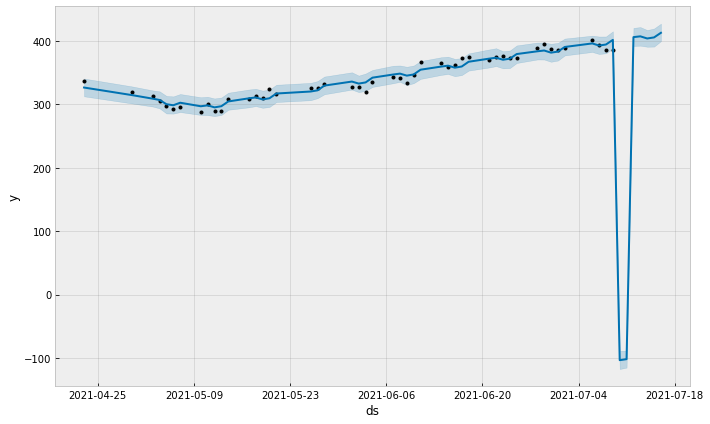

In [83]:
m.plot(forecast)
plt.show()

## LSTM Model (code should be correct, but somethings wrong with the package) 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [ ]:
len(data)/2

In [ ]:
new_data = data[['datetime','Close']]
for i in range(0,len(data)):
    new_data['datetime'][i] = data['datetime'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.datetime
new_data.drop('datetime', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:274,:]
valid = dataset[274:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)